In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Datasets/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.shape

(12330, 18)

In [7]:
df.isnull().sum()*100/len(df)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

In [8]:
for feature in df.columns:
    if df[feature].dtype != 'O' and df[feature].dtype != 'bool':
        print(feature, df[feature].dtype, df[feature].nunique())

Administrative int64 27
Administrative_Duration float64 3335
Informational int64 17
Informational_Duration float64 1258
ProductRelated int64 311
ProductRelated_Duration float64 9551
BounceRates float64 1872
ExitRates float64 4777
PageValues float64 2704
SpecialDay float64 6
OperatingSystems int64 8
Browser int64 13
Region int64 9
TrafficType int64 20


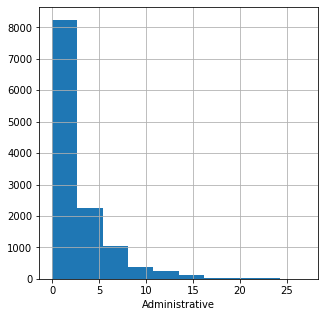

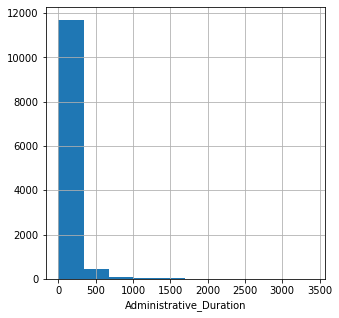

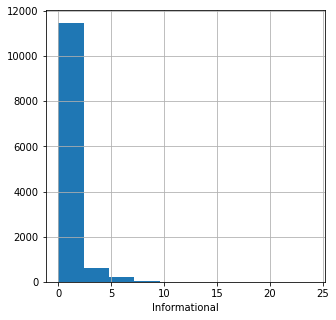

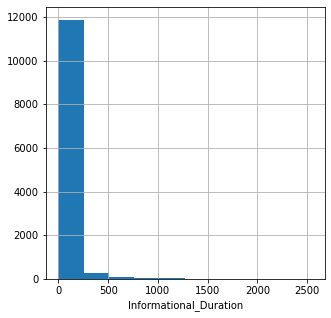

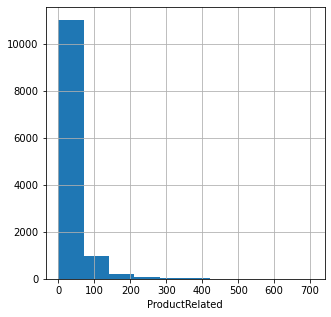

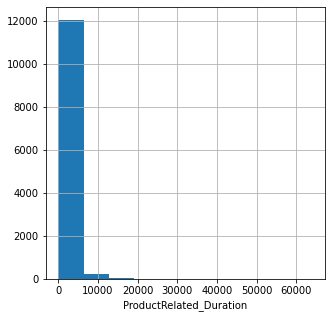

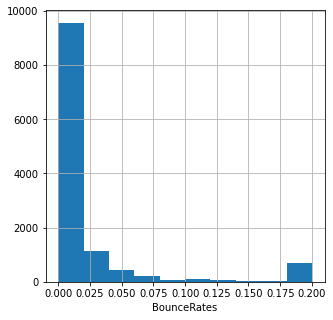

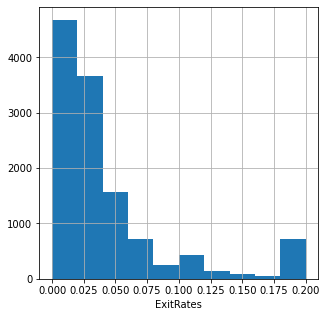

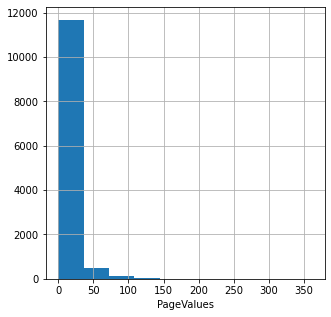

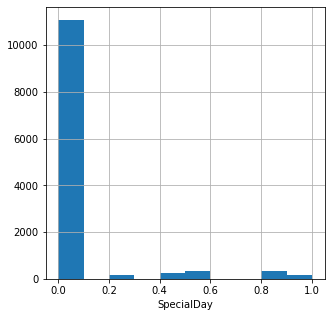

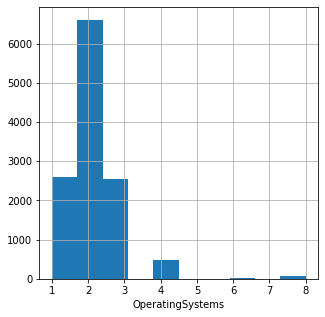

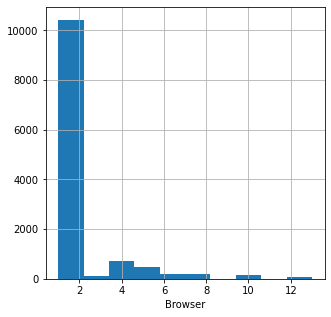

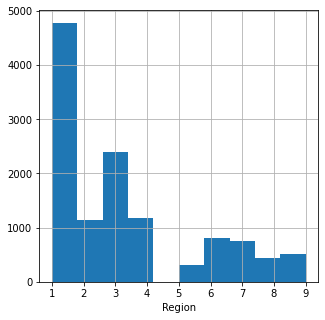

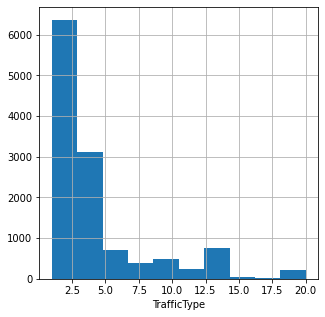

In [9]:
for feature in df.columns:
    if df[feature].dtype != 'O' and df[feature].dtype != 'bool':
        plt.figure(figsize=(5,5))
        df[feature].hist(bins=10)
        plt.xlabel(feature)
        plt.show()

In [10]:
dist_features = []
cat_features = []
for feature in df.columns:
    if df[feature].nunique() < 15:
        cat_features.append(feature)
    else:
        dist_features.append(feature)

print(cat_features)
print(dist_features)

['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Weekend', 'Revenue']
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'TrafficType']


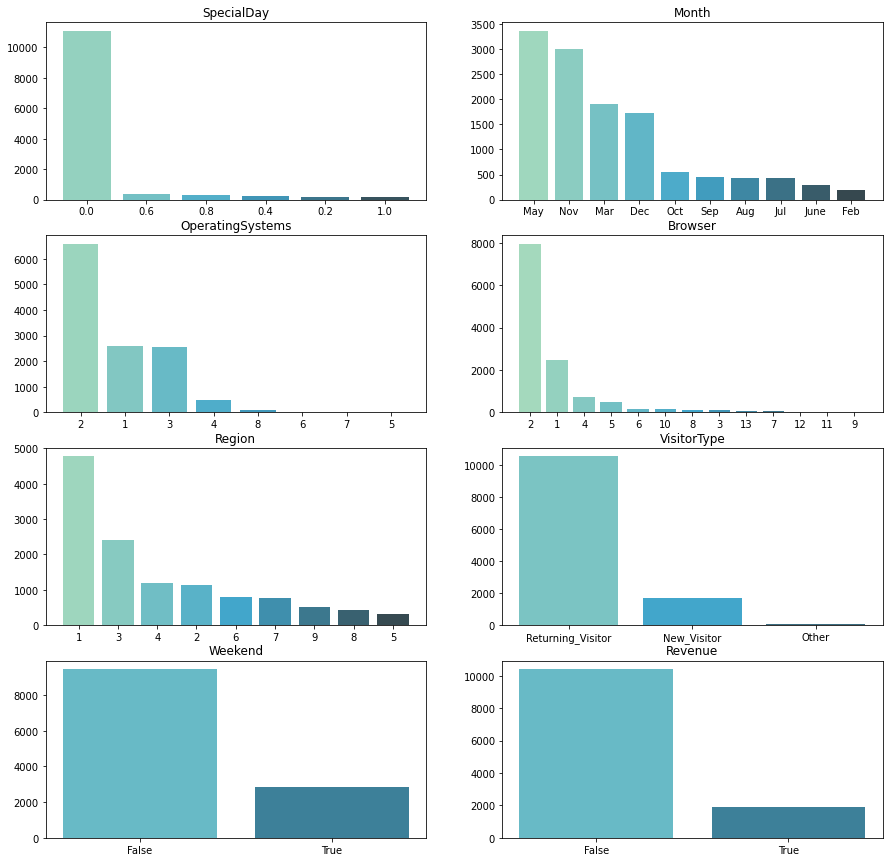

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

for index, feature in enumerate(cat_features):
    i = index//2
    j = index%2

    ax[i, j].bar(df[feature].astype('str').value_counts().index, df[feature].value_counts(), color=sns.color_palette("GnBu_d", n_colors=df[feature].nunique()))
    ax[i, j].set_title(feature)

    

In [19]:
def plot_revenue_with_feature(feature):
    plt.figure(figsize=(10, 10))
    barwidth = 0.30

    data = df[[feature, 'Revenue']]
    bars1 = data[df['Revenue'] == True].groupby([feature]).Revenue.count()
    bars2 = data[df['Revenue'] == False].groupby([feature]).Revenue.count()

    pos1 = np.arange(len(bars1))
    pos2 = [x + barwidth for x in pos1]

    plt.bar(pos1, bars1, color=sns.color_palette("GnBu_d",n_colors=2)[0], width=barwidth, label='revenue')
    plt.bar(pos2, bars2, color=sns.color_palette("GnBu_d",n_colors=2)[1], width=barwidth, label='no-revenue')

    plt.xlabel(feature)
    plt.legend()
    plt.xticks(pos2, bars1.index)
    plt.show()


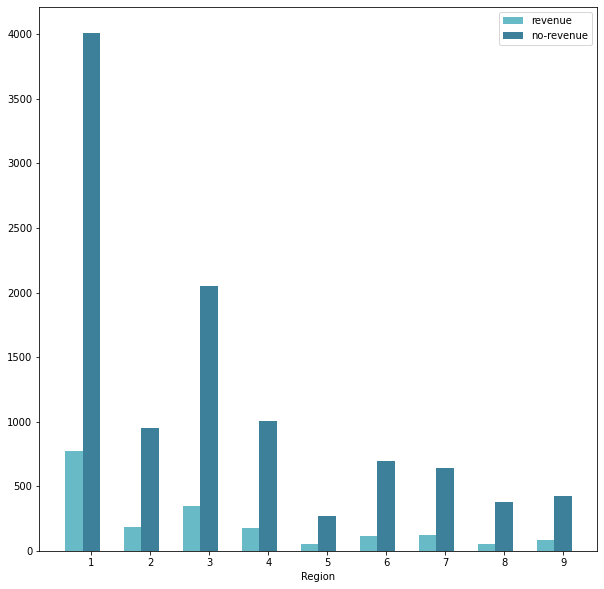

In [20]:
plot_revenue_with_feature('Region')